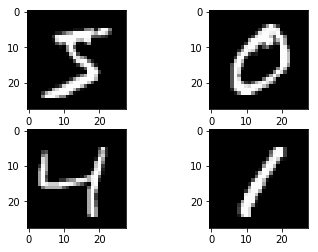

In [42]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [1]:
import numpy as np
seed = 7
np.random.seed(seed)

In [31]:
# flatten 28*28 images to a 784 vector for each image
print(x_train.shape)
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

(60000, 28, 28)


In [32]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

In [33]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [34]:
from keras.models import Sequential
from keras.layers import Dense
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [35]:
# build the model
model = baseline_model()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2783 - acc: 0.9208 - val_loss: 0.1408 - val_acc: 0.9573
Epoch 2/10
 - 3s - loss: 0.1117 - acc: 0.9676 - val_loss: 0.0925 - val_acc: 0.9704
Epoch 3/10
 - 3s - loss: 0.0719 - acc: 0.9797 - val_loss: 0.0786 - val_acc: 0.9777
Epoch 4/10
 - 3s - loss: 0.0505 - acc: 0.9857 - val_loss: 0.0748 - val_acc: 0.9768
Epoch 5/10
 - 3s - loss: 0.0375 - acc: 0.9893 - val_loss: 0.0684 - val_acc: 0.9793
Epoch 6/10
 - 3s - loss: 0.0269 - acc: 0.9927 - val_loss: 0.0631 - val_acc: 0.9806
Epoch 7/10
 - 3s - loss: 0.0211 - acc: 0.9946 - val_loss: 0.0623 - val_acc: 0.9809
Epoch 8/10
 - 3s - loss: 0.0144 - acc: 0.9968 - val_loss: 0.0648 - val_acc: 0.9795
Epoch 9/10
 - 4s - loss: 0.0108 - acc: 0.9978 - val_loss: 0.0577 - val_acc: 0.9814
Epoch 10/10
 - 4s - loss: 0.0079 - acc: 0.9986 - val_loss: 0.0577 - val_acc: 0.9824
Baseline Error: 1.76%


In [4]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
import numpy as np

In [7]:
def conv_model():
    classifier = Sequential()
    classifier.add(Convolution2D(32,5,5, input_shape = (28, 28, 1), activation = 'relu'))
    """32- Number of feature detectors
    3- Number of rows in a feature detector
    3- Number of columns in a feature detector
    usually we select a 3*3 feature detector
    input_shape = 28* 28 image size
    channel = 1 for black and white images
    channel = 3 for colored images"""
    classifier.add(MaxPooling2D(pool_size = (2,2)))
    # After Applying Maxpooling we will get a reducred feature map.
    # Usually we select a pool_size as 2*2
    
    # Adding a second convolution layer
    classifier.add(Convolution2D(16,3,3,activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2,2)))
    
    classifier.add(Flatten())
    classifier.add(Dense(output_dim = 128, activation = 'relu'))
    # Adding one more hidden layer
    classifier.add(Dense(output_dim = 64, activation = 'relu'))
    classifier.add(Dense(output_dim = 10, activation = 'softmax'))

    # compile CNN
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier



In [8]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
# build the model
model = conv_model()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

""" We have not done any image augmentation here as we have enough number of samples i.e., 60000
    But try with doing image augmentation too to know how the accuracy is being effected"""

/Users/srimounicamotipalli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(28, 28, 1..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/srimounicamotipalli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/Users/srimounicamotipalli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
/Users/srimounicamotipalli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
/Users/srimounicamotipalli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 435us/step - loss: 0.3358 - acc: 0.9015 - val_loss: 0.0923 - val_acc: 0.9705
Epoch 2/10
60000/60000 [==============================] - 23s 389us/step - loss: 0.0783 - acc: 0.9767 - val_loss: 0.0520 - val_acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 23s 386us/step - loss: 0.0546 - acc: 0.9834 - val_loss: 0.0406 - val_acc: 0.9865
Epoch 4/10
60000/60000 [==============================] - 23s 386us/step - loss: 0.0428 - acc: 0.9868 - val_loss: 0.0347 - val_acc: 0.9885
Epoch 5/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.0345 - acc: 0.9896 - val_loss: 0.0361 - val_acc: 0.9879
Epoch 6/10
60000/60000 [==============================] - 25s 422us/step - loss: 0.0295 - acc: 0.9911 - val_loss: 0.0329 - val_acc: 0.9892
Epoch 7/10
60000/60000 [==============================] - 26s 425us/step - loss: 0.0245 - acc: 0.9922 - val_loss: 0.

' We have not done any image augmentation here as we have enough number of samples i.e., 60000\n    But try with doing image augmentation too to know how the accuracy is being effected'